** A company has provided us with an anonymised classified data with random letters for column names and a column nammed Target class. we are not provided what the column represents or the numbers represents.We are asked to predict the Target Class.**

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Getting the Data

In [10]:
df = pd.read_csv('KNN_Project_Data')

In [11]:
df.head() 

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# Standardizing the Variables

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

** Fitting scaler to the features.**

In [14]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

**Transforming the features to a scaled version.**

In [15]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [16]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

# Using KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [21]:
knn = KNeighborsClassifier(n_neighbors=1)

**Fitting KNN model to the training data.**

In [22]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

# Predictions and Evaluations

In [23]:
pred = knn.predict(X_test)

** Creating a confusion matrix and classification report.**

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
print(confusion_matrix(y_test,pred))

[[119  44]
 [ 32 105]]


In [27]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.79      0.73      0.76       163
          1       0.70      0.77      0.73       137

avg / total       0.75      0.75      0.75       300



# Choosing a K Value

In [29]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

**Plotting Error Rate vs. K Value**

Text(0,0.5,'Error Rate')

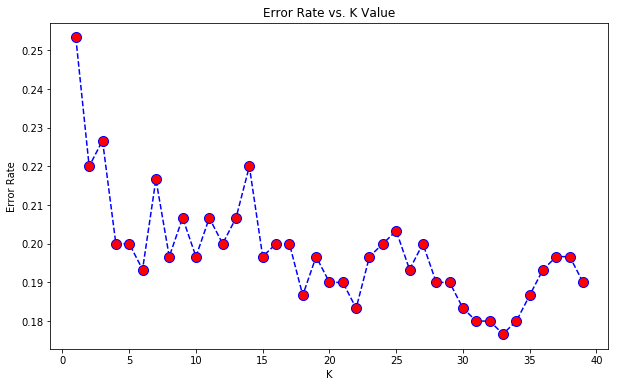

In [30]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Retraining with new K Value

**Retraining model with the best K value and regenerating classification report and the confusion matrix.**

In [31]:
# NOW WITH K=33
knn = KNeighborsClassifier(n_neighbors=33)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=33')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=33


[[128  35]
 [ 18 119]]


             precision    recall  f1-score   support

          0       0.88      0.79      0.83       163
          1       0.77      0.87      0.82       137

avg / total       0.83      0.82      0.82       300



** we have got a better prediction than earlier with the revised K value**